<hr>
<h1 style = 'text-transform:uppercase'>Case Study: How Does a Bike-Share Navigate Speedy Success?</h1>
<hr>

<h2>Statement of the Business Task</h2>

    You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
    of marketing (Moreno) believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
    your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
    your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
    must approve your recommendations, so they must be backed up with compelling data insights and professional data
    visualizations.

    Three questions will guide the future marketing program:
        1. How do annual members and casual riders use Cyclistic bikes differently?
        2. Why would casual riders buy Cyclistic annual memberships?
        3. How can Cyclistic use digital media to influence casual riders to become members?

    Business Task:
    Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?    

In [1]:
## Loading the necessary packages for the analysis

library(tidyverse)
library(dplyr)
library(lubridate)
library(janitor)
library(scales)
library(ggplot2)
library(readr)
library(skimr)
library(tidyr)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.1.8
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




<hr>
<h3>DATA COLLECTION<h3>
<hr>

        DATA DESCRIPTION
        ride_id (categorical): Unique number assigned to a ride trip.
        rideable_type (categorical): Type of bike used during trip; electric bike, classic bike, docked_bike.
        started_at (datetime): Start date and time for the trip
        ended_at (datetime): End data and time for the trip
        start_station_name (categorical): Name of the station where the trip started
        start_station_id (categorical): Unique identification code assigned to the start station.
        end_station_name (categorical): Name of the station where the trip ended.
        end_station_id (categorical): Unique identification code assigned to the end station.
        start_lat (numeric): Latitude coordinate of where the trip started.
        start_lng (numeric): Longitude coordinate of where the trip started.
        end_lat (numeric): Latitude coordinate of where the trip ended.
        end_lng (numeric): Longitude coordinate of where the trip ended.
        member_casual (categorical): Customer type; “member” = annual member, “casual” = casual rider.


In [2]:
# Loading the 12 months datasets of Cyclistic

Jan   <- read_csv ("2022_divvy_tripdata/202201-divvy-tripdata.csv")
Feb   <- read_csv ("2022_divvy_tripdata/202202-divvy-tripdata.csv")
Mar   <- read_csv ("2022_divvy_tripdata/202203-divvy-tripdata.csv")
Apr   <- read_csv ("2022_divvy_tripdata/202204-divvy-tripdata.csv")
May   <- read_csv ("2022_divvy_tripdata/202205-divvy-tripdata.csv")
Jun   <- read_csv ("2022_divvy_tripdata/202206-divvy-tripdata.csv")
Jul   <- read_csv ("2022_divvy_tripdata/202207-divvy-tripdata.csv")
Aug   <- read_csv ("2022_divvy_tripdata/202208-divvy-tripdata.csv")
Sep   <- read_csv ("2022_divvy_tripdata/202209-divvy-tripdata.csv")
Oct   <- read_csv ("2022_divvy_tripdata/202210-divvy-tripdata.csv")
Nov   <- read_csv ("2022_divvy_tripdata/202211-divvy-tripdata.csv")
Dec   <- read_csv ("2022_divvy_tripdata/202212-divvy-tripdata.csv")

Rows: 103770 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7

<hr>
<h3>WRANGLE DATA AND COMBINE INTO A SINGLE FILE</h3>
<hr>

In [3]:
# combined the 12-month historical trip data stored in '22022_divvy_tripdata' into one dataset called trip_df
merged_df <- list.files(path='2022_divvy_tripdata', full.names = TRUE) %>%
    lapply(read_csv) %>%
    bind_rows

Rows: 103770 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7

<hr>
<p>Made a copy of the merged dataframe to prevent any changes to the subset from affecting the original dataframe as well.</p>

In [4]:
# Make a copy of the data frame
trip_df <- data.frame(merged_df)

<hr>

    Inspecting the dataframe and looking for incongruencies

In [5]:
# Inspecting the merged data
glimpse(trip_df)

# Generate summary statistics for all columns
summary(trip_df)

Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7~
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "~
$ started_at         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-~
$ ended_at           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-~
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A~
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13~
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr~
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",~
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4~
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624~
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4~
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627~
$ member_cas

   ride_id          rideable_type        started_at                    
 Length:5667717     Length:5667717     Min.   :2022-01-01 00:00:05.00  
 Class :character   Class :character   1st Qu.:2022-05-28 19:21:05.00  
 Mode  :character   Mode  :character   Median :2022-07-22 15:03:59.00  
                                       Mean   :2022-07-20 07:21:18.74  
                                       3rd Qu.:2022-09-16 07:21:29.00  
                                       Max.   :2022-12-31 23:59:26.00  
                                                                       
    ended_at                      start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48.00   Length:5667717     Length:5667717    
 1st Qu.:2022-05-28 19:43:07.00   Class :character   Class :character  
 Median :2022-07-22 15:24:44.00   Mode  :character   Mode  :character  
 Mean   :2022-07-20 07:40:45.33                                        
 3rd Qu.:2022-09-16 07:39:03.00                                 

<hr>
<h3>CLEAN AND MANIPULATE DATA FOR ANALYSIS</h3>
<hr>

    Transform the time variables to a more usable formats to measure rides duration

In [6]:
# Create new columns "for started_at" & "ended_at" 
trip_df <- trip_df %>% 
  mutate(month = lubridate::month(started_at, label = TRUE),
         day_n = lubridate::wday(started_at),
         week_day = lubridate::wday(started_at, label = TRUE),
         hour = lubridate::hour(started_at),
         ride_length = as.numeric(difftime(ended_at, started_at, units = "mins")))

# drop 'started_at', 'ended_at' fields from the dataframe 
trip_df <- trip_df %>%
  select(-c('started_at', 'ended_at'))

In [7]:
head(trip_df)

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,day_n,week_day,hour,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<ord>,<dbl>,<ord>,<int>,<dbl>
1,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,Jan,5,Thu,11,2.950000
2,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,Jan,2,Mon,8,4.350000
3,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,Jan,3,Tue,4,4.350000
4,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,Jan,3,Tue,0,14.933333
5,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,Jan,5,Thu,1,6.033333
6,A39C6F6CC0586C0B,classic_bike,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,Jan,3,Tue,18,3.366667


    Four new columns were added to the dataframe such as month, week_day, hour and ride_length for further analysis of the dataframe. 

    Inspect the cleaned dataframe for any incongruencies

In [8]:
# Inspecting the merged data
glimpse(trip_df)

# Generate summary statistics for all columns
skim_without_charts(trip_df)

Rows: 5,667,717
Columns: 16
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7~
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "~
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A~
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13~
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr~
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",~
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4~
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624~
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4~
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627~
$ member_casual      <chr> "casual", "casual", "member", "casual", "member", "~
$ month              <ord> Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, J~
$ day_n     

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 19 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ride_id,0,1.0000000,16,16,0,5667717,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,833064,0.8530159,7,64,0,1674,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,833064,0.8530159,3,44,0,1313,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,892742,0.8424865,9,64,0,1692,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,892742,0.8424865,3,44,0,1317,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,factor,month,0,1.0000000,NA,NA,NA,NA,NA,TRUE,12,"Jul: 823488, Aug: 785932, Jun: 769204, Sep: 701339",NA,NA,NA,NA,NA,NA,NA
9,factor,week_day,0,1.0000000,NA,NA,NA,NA,NA,TRUE,7,"Sat: 916471, Thu: 841591, Fri: 801787, Wed: 798223",NA,NA,NA,NA,NA,NA,NA


    ride_length is one thing that grabs my attention right away with a negative value of -10353.53 and the hour associated with it is zero. start_station_name, start_station_id, end_station_name and end_station_id have the following missing values 0.147, 0.147, 0.158 and 0.158 respectively. Its highly likely we drop both the negative and missing values to further our analysis. 

In [9]:
# Check for negative ride lengths and exclude "bad" data or negative ride_length 
trip_df <- subset(trip_df,ride_length >= 0)
check <- nrow(subset(trip_df,ride_length < 0))

# Print results
if (check  == 0) {
    cat("There are no negative values in the column.", "\n")
} else {
    cat("The number of negative values in the column is:", check , "\n")
}

There are no negative values in the column. 


In [10]:
# omitting missing values from the dataframe 
cleaned_trips <- na.omit(trip_df)

# Count total missing data points
total_missing_data_points <- cleaned_trips %>%
  summarise_all(~sum(is.na(.))) %>%
  unlist() %>%
  sum()

# Print results
if (total_missing_data_points == 0){
    cat("There are no missing data points in the dataframe", "\n")
} else {
    cat("Total missing data points:", total_missing_data_points, "\n")
}

There are no missing data points in the dataframe 


In [11]:
# Find unique riders by removing duplicates
unique_riders <- trip_df %>%
  distinct(ride_id, .keep_all = TRUE)

# Assign cleaned data frame to new object
cleaned_data <- unique_riders

# Check for duplicates based on 'ride_id' column
if (any(duplicated(cleaned_data$ride_id))) {
  cat("There are duplicates based on 'ride_id' column.", "\n")
} else {
  cat("There are no duplicates based on 'ride_id' column.", "\n")
}

There are no duplicates based on 'ride_id' column. 


<hr>
<h3>CONDUCT DESCRIPTIVE ANALYSIS<h3>
<hr>

#### Comparing annual members and casual riders use of Cyclistic bikes 

    Share of rides taken by each member type

member_casual,n,percent
<chr>,<int>,<chr>
casual,2321977,41%
member,3345640,59%


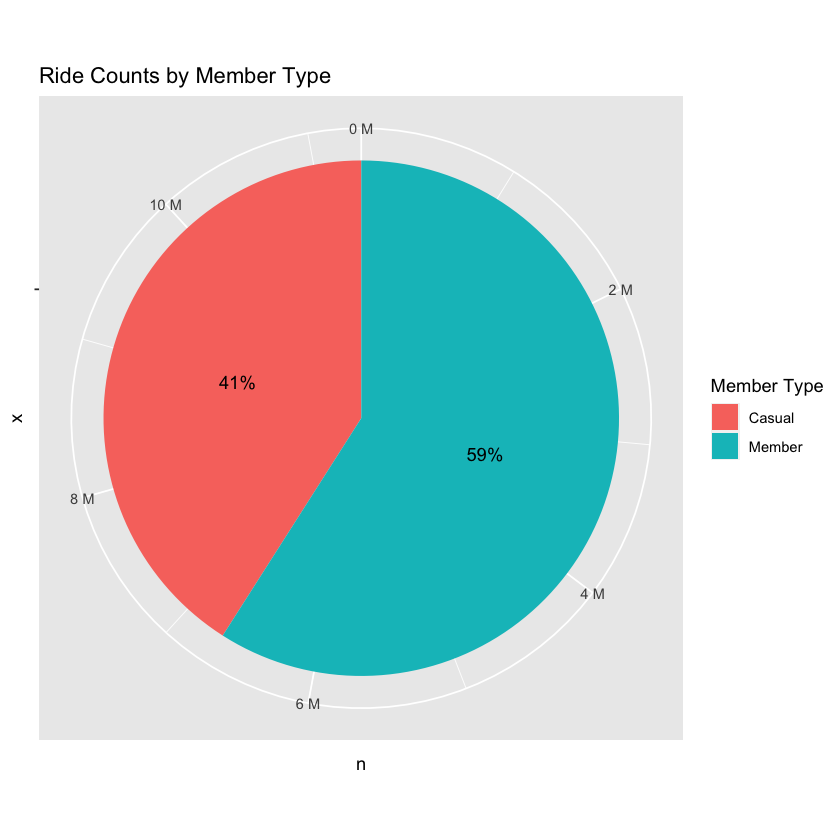

In [12]:

# Calculate percentage of rides for each member type
ride_summary <- cleaned_data %>% 
  count(member_casual, name = "n") %>%
  mutate(percent = scales::percent(n/sum(n)))

# create pie chart of ride counts by member type with percentage labels
ggplot(ride_summary, aes(x="", y=n, fill=member_casual)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y") +
  labs(title="Ride Counts by Member Type", fill="Member Type") +
  scale_y_continuous(labels = scales::label_number(scale = 2e-6, suffix = " M")) + 
  geom_text(aes(label=percent), position = position_stack(vjust = 0.5), color = "black") +
  scale_fill_discrete(labels = c("Casual", "Member"))

ride_summary

    The members of Cyclistic bike have a usage share of 59% compared to the casual riders which is 41%. 

    Share of Rideable type

rideable_type,count,percent_of_total
<chr>,<int>,<chr>
classic_bike,2601186,45.9%
docked_bike,177474,3.1%
electric_bike,2888957,51.0%


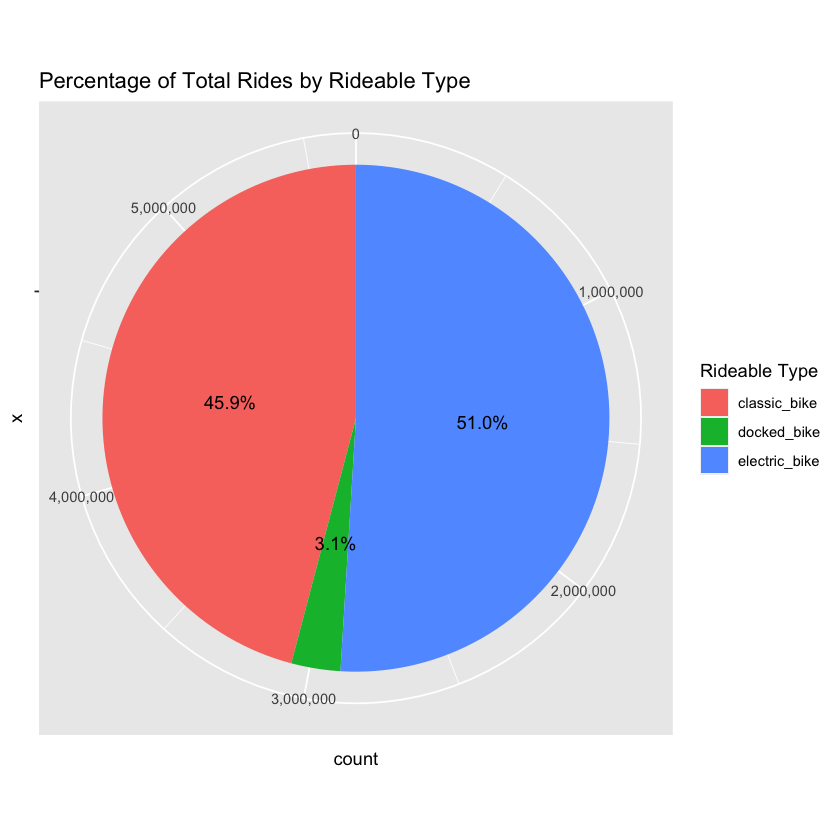

In [13]:
# Group the data by rideable type and count the number of observations
df_count <- cleaned_data %>% 
  count(rideable_type, name = "count") %>% 
  mutate(percent_of_total = scales::percent(count / sum(count)))

# Print the summary table
df_count

# Create a polar bar chart to visualize the percentage of total ride length by rideable type
ggplot(df_count, aes(x = "", y = count, fill = rideable_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  scale_y_continuous(labels = scales::comma_format()) +
  labs(title = "Percentage of Total Rides by Rideable Type",
       fill = "Rideable Type") +
  geom_text(aes(label = percent_of_total),
            position = position_stack(vjust = 0.5), color = "#000000")

    Different type of bike used by each member group

member_casual,rideable_type,num_rides,percent
<chr>,<chr>,<int>,<chr>
casual,classic_bike,891443,34%
casual,docked_bike,177474,100%
casual,electric_bike,1253060,43%
member,classic_bike,1709743,66%
member,electric_bike,1635897,57%


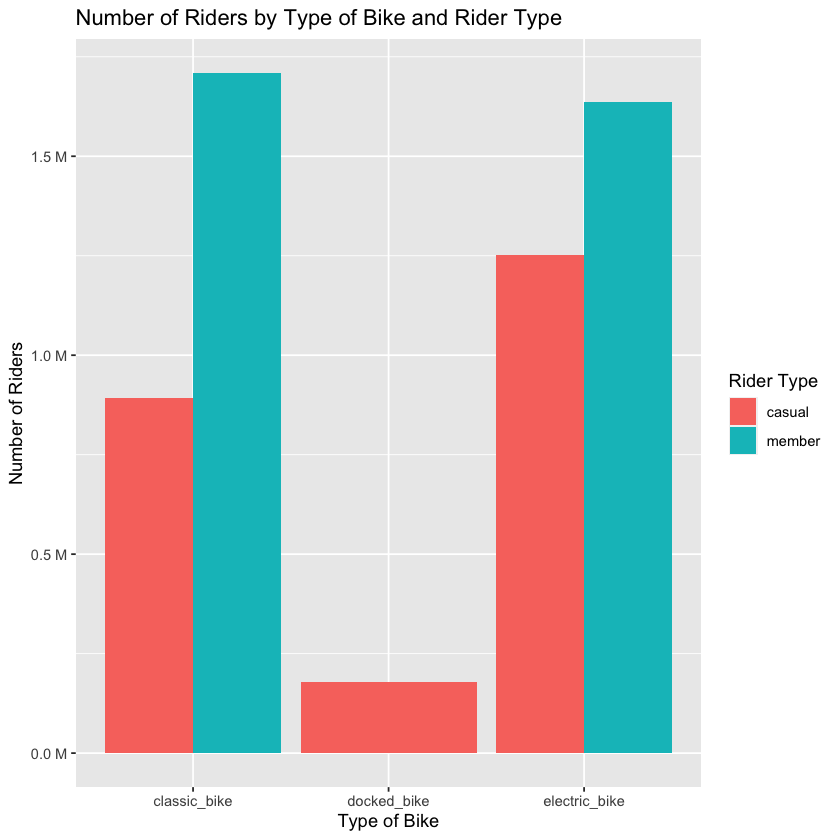

In [14]:
# Group the data by rideable type and member_casual, and count the number of rides
df_num_rides <- cleaned_data %>% 
  count(member_casual, rideable_type, name = "num_rides")

# calculate percentage column for each month and member_casual combination
df_percent <- df_num_rides %>%
  group_by(rideable_type) %>%
  mutate(percent = scales::percent(num_rides/sum(num_rides)))

# Print the summary table
df_percent

# Create a bar chart to visualize the number of riders by type of bike and rider type
ggplot(df_num_rides, aes(x = rideable_type, y = num_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Riders by Type of Bike and Rider Type",
       x = "Type of Bike", y = "Number of Riders",
       fill = "Rider Type")+ 
  scale_y_continuous(labels = scales::label_number(scale = 1e-6, suffix = " M"))

    From the chart above, the Docker bikes has a share of 3.1% of the total bike. This bikes are mostly used by the casual bike riders.

    monthly breakdown of bike usage by each rider type 

month,member_casual,number_of_rides,percent
<ord>,<chr>,<int>,<chr>
Jan,casual,18520,18%
Jan,member,85250,82%
Feb,casual,21416,19%
Feb,member,94193,81%
Mar,casual,89880,32%
Mar,member,194160,68%


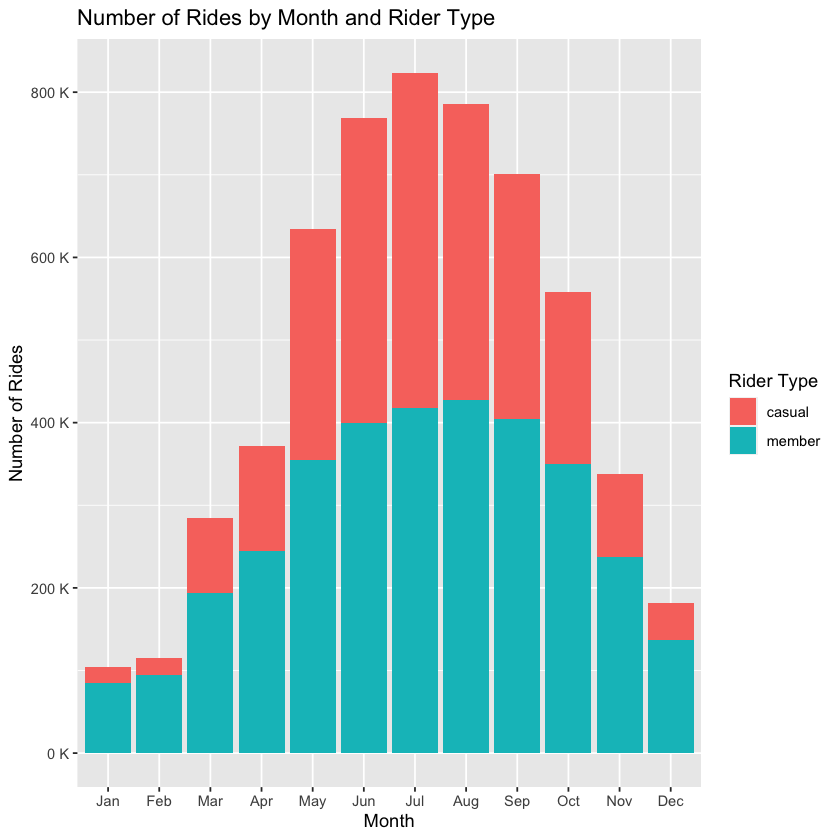

In [15]:
# Group the data by month and member_casual, and calculate the count for number_of_rides
df_count <- cleaned_data %>%
  count(month, member_casual, name = "number_of_rides")

# Calculate percentage column for each month and member_casual combination
df_percent <- df_count %>%
  group_by(month) %>%
  mutate(percent = scales::percent(number_of_rides/sum(number_of_rides)))

# Print the summary table
head(df_percent)

# Create stacked bar chart of ride counts by month and member type with percentage labels and legend
ggplot(df_percent, aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col() +
  labs(title = "Number of Rides by Month and Rider Type",
       x = "Month", y = "Number of Rides",
       fill = "Rider Type") +
  scale_y_continuous(labels = scales::label_number(scale = 1e-3, suffix = " K")) + 
  theme(legend.position = "right")

    Group Member Ride Duration Analysis

member_casual,avg_ride_length,percent
<chr>,<dbl>,<chr>
casual,29.14572,70%
member,12.71401,30%


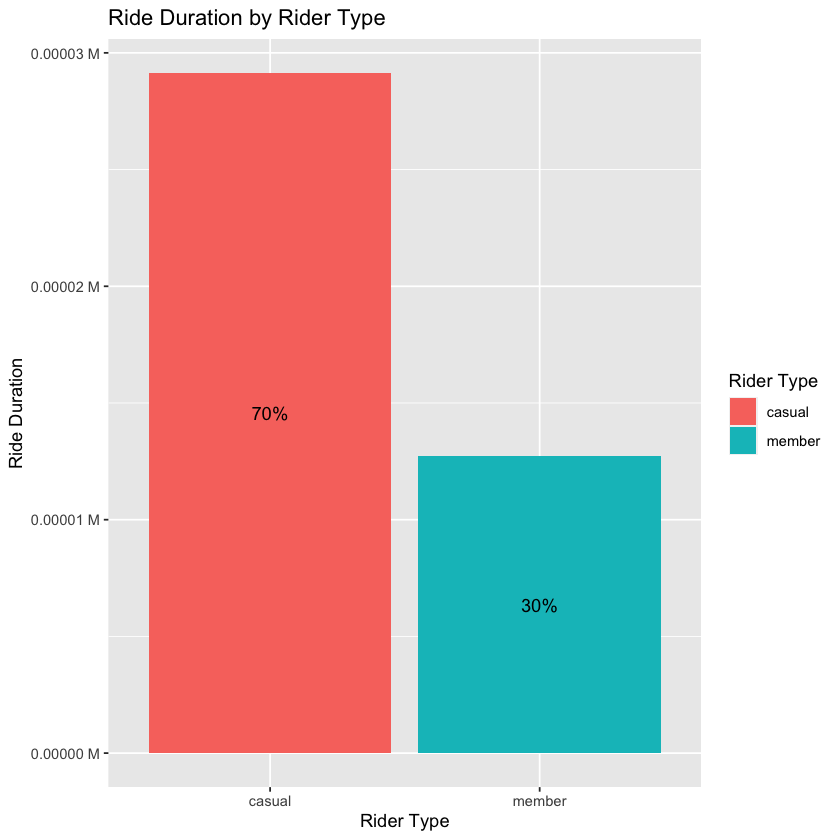

In [16]:
# Calculate average ride length by rider type and add a percent column
pivot_table <- cleaned_data %>% 
  group_by(member_casual) %>%
  summarise(avg_ride_length = mean(ride_length, na.rm = TRUE)) %>% 
  mutate(percent = scales::percent(prop.table(avg_ride_length)))

# Print pivot table
pivot_table

# Create a bar chart of average ride length by rider type with percentage labels
ggplot(pivot_table, aes(x = member_casual, y = avg_ride_length, fill = member_casual)) +
  geom_col() +
  labs(title = "Ride Duration by Rider Type",
       x = "Rider Type", y = "Ride Duration",
       fill = "Rider Type") +
  scale_y_continuous(labels = scales::label_number(suffix = " M", scale = 1e-6)) + 
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5), color = "#000000")

    Total ride duration by type of bike

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,rideable_type,total_duration,percent
<chr>,<chr>,<dbl>,<chr>
casual,classic_bike,25630663,37.9%
casual,docked_bike,21778110,32.2%
casual,electric_bike,20266923,29.9%
member,classic_bike,23784673,56%
member,electric_bike,18751830,44%


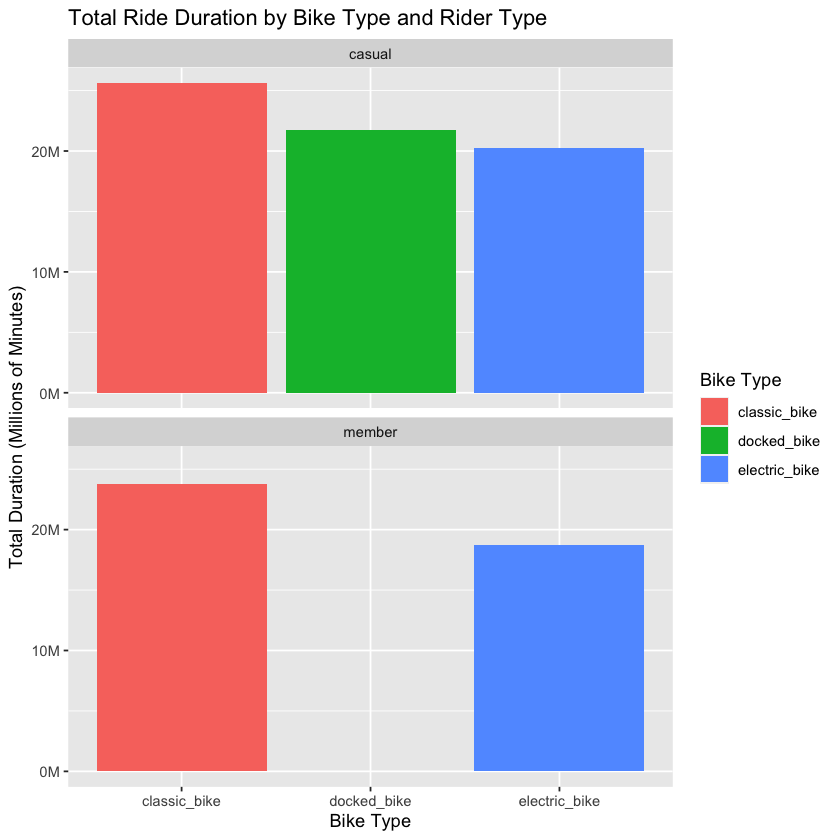

In [17]:
# Group the data by rideable type and member_casual, and calculate the total ride duration
df_duration <- cleaned_data %>%
  group_by(member_casual, rideable_type) %>%
  summarise(total_duration = sum(ride_length))

# calculate percentage column for each member_casual and rideable_type combination
df_percent <- df_duration %>% 
  group_by(member_casual) %>% 
  mutate(percent = scales::percent(total_duration/sum(total_duration))) 

# Print the summary table
df_percent

# Create a bar chart to visualize the total duration of rides by type of bike and rider type
ggplot(df_duration, aes(x = rideable_type, y = total_duration, fill = rideable_type)) +
  geom_col(position = "dodge") +
  facet_wrap(~member_casual, ncol = 1) +
  scale_y_continuous(labels = scales::comma_format(suffix = "M", scale = 1e-6)) +
  labs(title = "Total Ride Duration by Bike Type and Rider Type",
       x = "Bike Type", y = "Total Duration (Millions of Minutes)",
       fill = "Bike Type")

    Total cycling time in hours by member type

member_casual,total_ride_time_hours,percent_of_total
<chr>,<int>,<chr>
casual,33776932,41.90%
member,46842921,58.10%


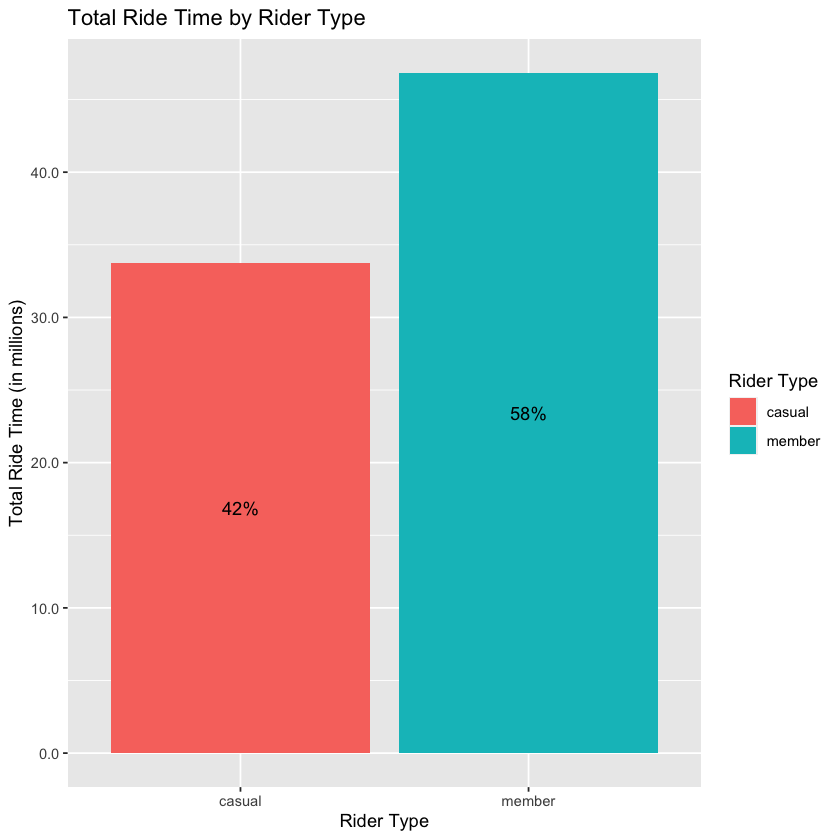

In [18]:
# Calculate total ride time by rider type
ride_time_summary <- cleaned_data %>%
  group_by(member_casual) %>%
  summarise(total_ride_time_hours = sum(hour, na.rm = TRUE)) %>%
  mutate(percent_of_total = scales::percent(total_ride_time_hours / sum(total_ride_time_hours), accuracy = 0.01))

# Create bar chart of percentage of total ride time by rider type
ggplot(ride_time_summary, aes(x = member_casual, y = total_ride_time_hours, fill = member_casual)) +
  geom_col() +
  labs(title = "Total Ride Time by Rider Type",
       x = "Rider Type", y = "Total Ride Time (in millions)",
       fill = "Rider Type") +
  scale_y_continuous(labels = scales::comma_format(scale = 1e-6, accuracy = 0.1)) +
  #theme_minimal() +
  geom_text(aes(label = percent(total_ride_time_hours/sum(total_ride_time_hours))), 
            position = position_stack(vjust = 0.5), color = "#000000")

# Print the summary table
ride_time_summary

    Number of ride trips completed by month per user type

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,member_casual,number_of_ridetrips,percent_of_total
<ord>,<chr>,<int>,<chr>
Jan,casual,18520,17.85%
Jan,member,85250,82.15%
Feb,casual,21416,18.52%
Feb,member,94193,81.48%
Mar,casual,89880,31.64%
Mar,member,194160,68.36%


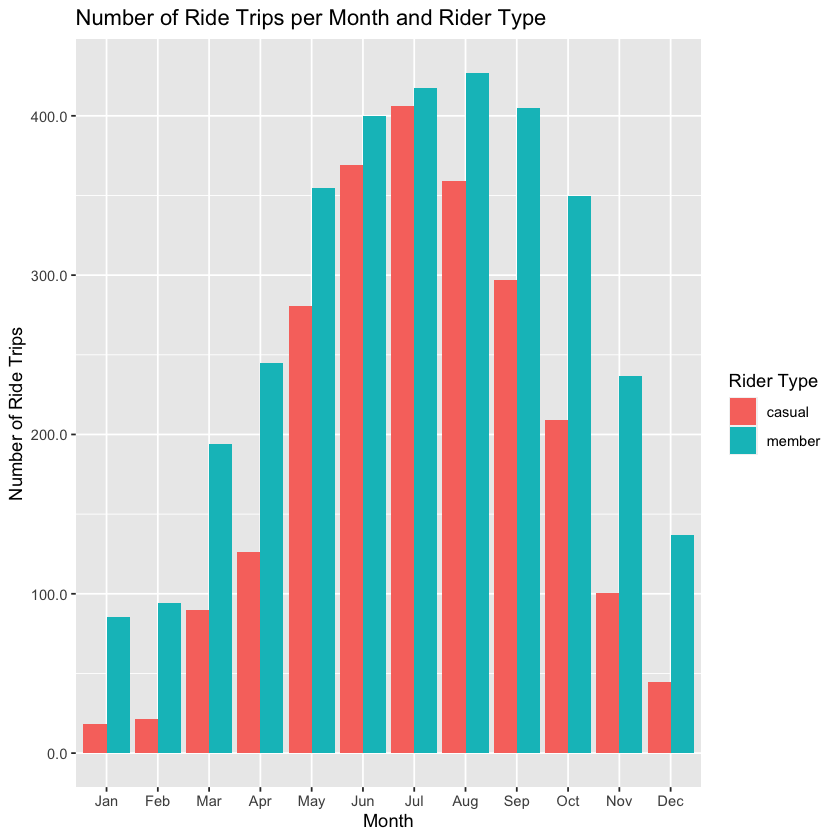

In [19]:
# Define a function to calculate the number of ride trips by month and rider type
calculate_number_of_ridetrips <- function(data) {
  data %>%
    group_by(month, member_casual) %>%
    summarise(number_of_ridetrips = n()) %>%
    mutate(percent_of_total = scales::percent(number_of_ridetrips / sum(number_of_ridetrips), accuracy = 0.01)) %>%
    ungroup()
}

# Call the function to calculate the summary table
df_avg <- calculate_number_of_ridetrips(cleaned_data)

# Create bar chart to visualize the number of ride trips by month and rider type
ggplot(df_avg, aes(x = month, y = number_of_ridetrips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Ride Trips per Month and Rider Type",
       x = "Month", y = "Number of Ride Trips",
       fill = "Rider Type")+
  scale_y_continuous(labels = scales::comma_format(scale = 1e-3, accuracy = 0.1))

# Print the summary table
head(df_avg)

    Average trips duration completed by month per user type

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,member_casual,avg_ride_length,percent_of_total
<ord>,<chr>,<dbl>,<chr>
Jan,casual,10.133333,57.52%
Jan,member,7.483333,42.48%
Feb,casual,10.900000,59.19%
Feb,member,7.516667,40.81%
Mar,casual,14.216667,63.90%
Mar,member,8.033333,36.10%


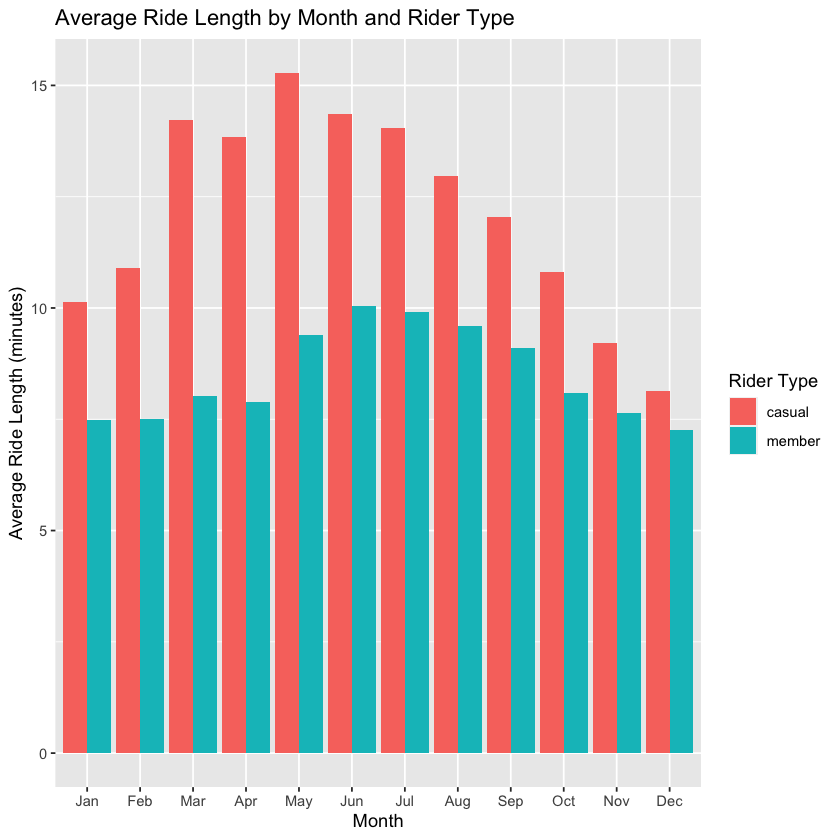

In [20]:
#Define a function to calculate the median ride length by month and rider type
calculate_avg_ride_length <- function(data) {
  data %>%
    group_by(month, member_casual) %>%
    summarise(avg_ride_length = median(ride_length)) %>%
    mutate(percent_of_total = scales::percent(avg_ride_length / sum(avg_ride_length), accuracy = 0.01)) %>%
    ungroup()
}

# Call the function to calculate the summary table
df_avg <- calculate_avg_ride_length(cleaned_data)

# Create bar chart to visualize the average ride length by month and rider type
ggplot(df_avg, aes(x = month, y = avg_ride_length, fill = member_casual)) +
  #geom_col() +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Ride Length by Month and Rider Type",
       x = "Month", y = "Average Ride Length (minutes)",
       fill = "Rider Type")

# Print the summary table again if needed
head(df_avg)

    Number of trips completed during the week by triders type. 

`summarise()` has grouped output by 'week_day'. You can override using the
`.groups` argument.


week_day,member_casual,number_of_ridetrips,percent_of_total
<ord>,<chr>,<int>,<chr>
Sun,casual,389011,50.12%
Sun,member,387208,49.88%
Mon,casual,277671,36.97%
Mon,member,473335,63.03%
Tue,casual,263731,33.71%
Tue,member,518618,66.29%


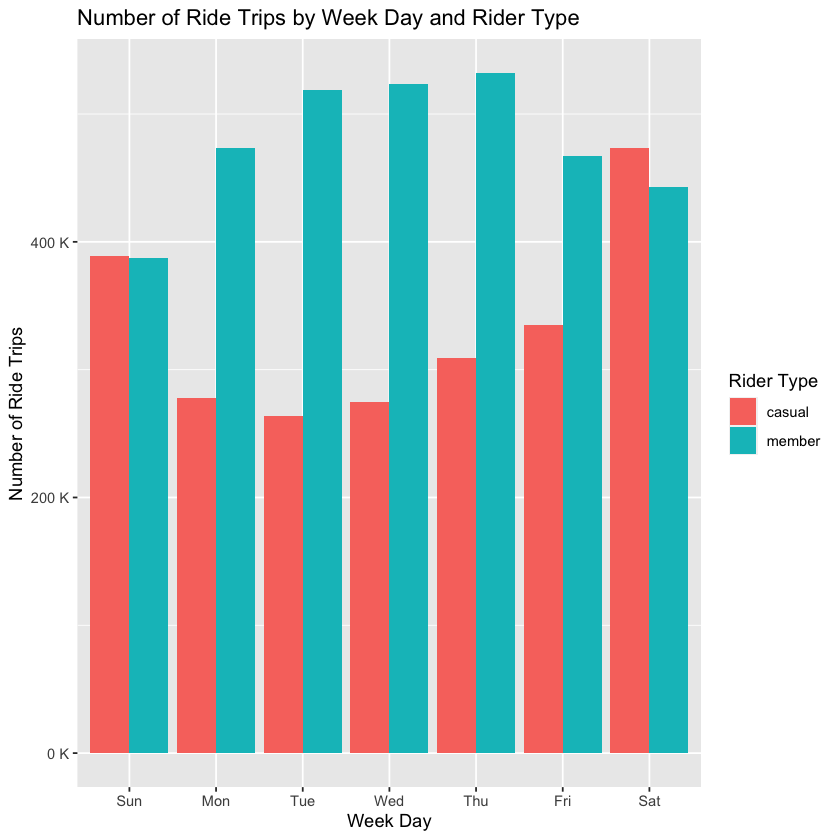

In [21]:
# Define a function to calculate the number of ride trips by week day and rider type
calculate_num_ridetrips <- function(data) {
  data %>%
    group_by(week_day, member_casual) %>%
    summarise(number_of_ridetrips = n()) %>%
    mutate(percent_of_total = scales::percent(number_of_ridetrips / sum(number_of_ridetrips), accuracy = 0.01)) %>%
    ungroup()
}

# Call the function to calculate the summary table
df_num <- calculate_num_ridetrips(cleaned_data)

# Create bar chart to visualize the number of ride trips by week day and rider type
ggplot(df_num, aes(x = week_day, y = number_of_ridetrips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Ride Trips by Week Day and Rider Type",
       x = "Week Day", y = "Number of Ride Trips",
       fill = "Rider Type") +
  scale_y_continuous(labels = scales::label_number(suffix = " K", scale = 1e-3))

# Print the summary table
head(df_num)

    Midweek and weekend ride duration analysis

`summarise()` has grouped output by 'week_day', 'hour'. You can override using
the `.groups` argument.


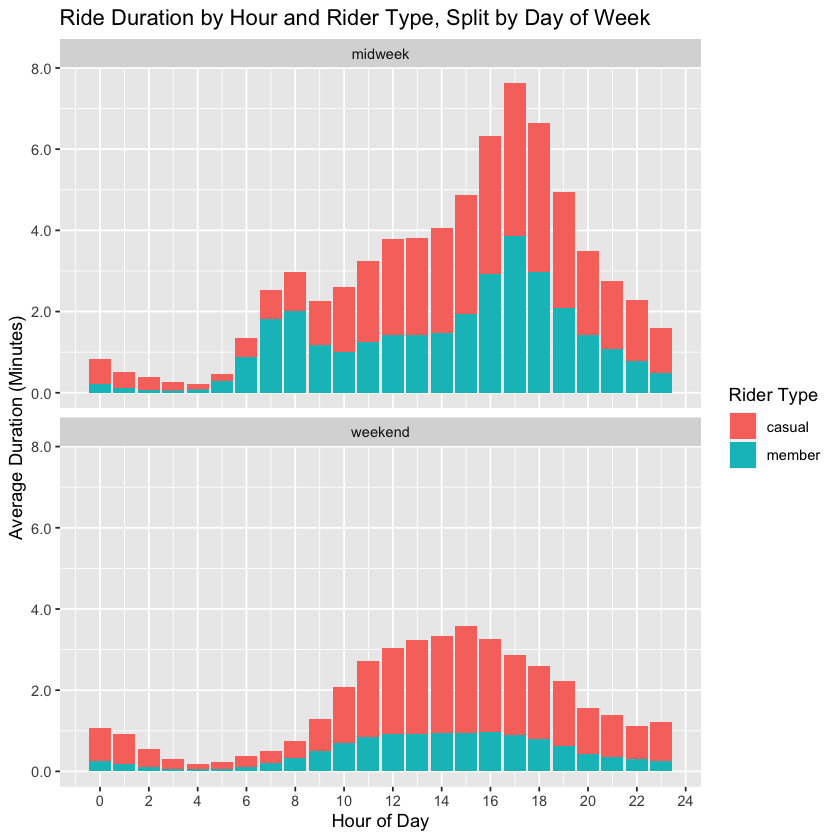

In [22]:
# Group the data by weekday, hour, and member type, and calculate the mean ride duration
df_duration <- cleaned_data %>% 
  group_by(week_day, hour, member_casual) %>%
  summarise(avg_duration = sum(ride_length)) %>%
  mutate(weekday_vs_weekend = ifelse(week_day %in% c('Sat', 'Sun'), 'weekend', 'midweek')) %>%
  ungroup()

# Create a bar chart of ride duration by hour and rider type, with faceting by weekday
ggplot(df_duration, aes(x = hour, y = avg_duration, fill = member_casual)) +
  geom_col() +
  labs(title = "Ride Duration by Hour and Rider Type, Split by Day of Week",
       x = "Hour of Day", y = "Average Duration (Minutes)",
       fill = "Rider Type") +
  facet_wrap(~ weekday_vs_weekend, ncol = 1)+
  scale_y_continuous(labels = comma_format(scale = 1e-6, accuracy = 0.1)) +
  scale_x_continuous(breaks = seq(0, 24, 2)) 
  #theme_classic()

    24 hours Ride duration analysis

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


hour,member_casual,avg_ride_length
<int>,<chr>,<dbl>
0,casual,1420340.2
0,member,468432.6
1,casual,1153930.1
1,member,296287.4
2,casual,771744.4
2,member,163498.9


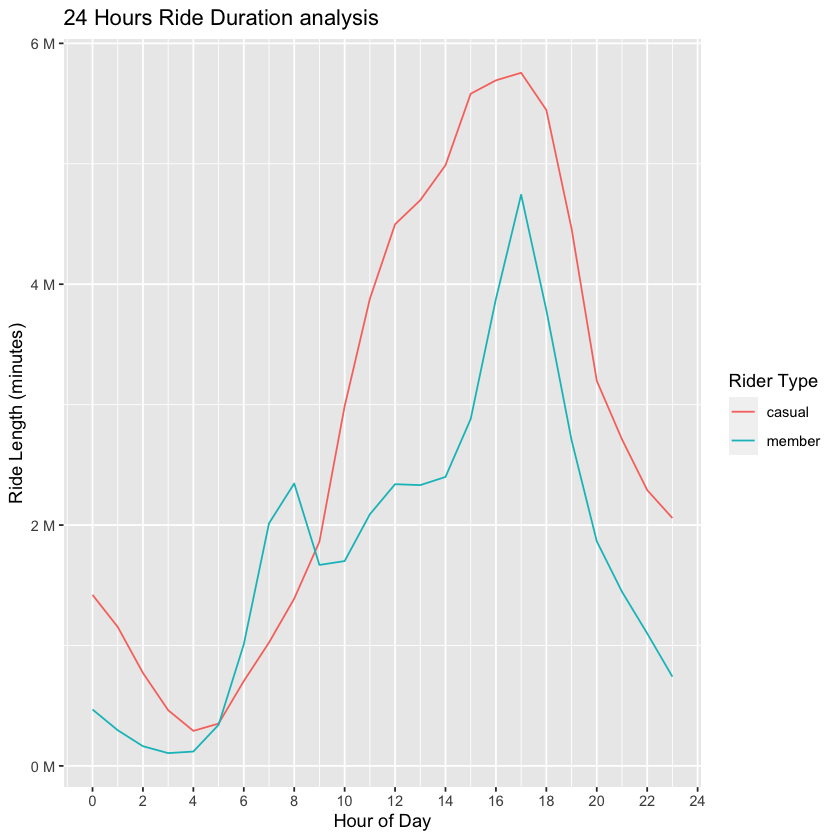

In [23]:
# group the data by hour and member_casual, and calculate the mean for ride_length
df_avg <- cleaned_data %>%
  group_by(hour, member_casual) %>%
  summarise(avg_ride_length = sum(ride_length))

# create line chart of average ride length by hour and member type
ggplot(df_avg, aes(x = hour, y = avg_ride_length, color = member_casual)) +
  geom_line() +
  labs(title = "24 Hours Ride Duration analysis",
       x = "Hour of Day", y = "Ride Length (minutes)",
       color = "Rider Type") +
  scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
  scale_x_continuous(breaks = seq(0, 24, 2))
  #theme_classic()

# Print the summary table
head(df_avg)

    Total Duration of Rides by Type of Bike and Rider Type

`summarise()` has grouped output by 'week_day'. You can override using the
`.groups` argument.


week_day,member_casual,total_duration,percent_of_total
<ord>,<chr>,<dbl>,<chr>
Sun,casual,15.016667,61.13%
Sun,member,9.550000,38.87%
Mon,casual,12.866667,60.36%
Mon,member,8.450000,39.64%
Tue,casual,11.533333,57.62%
Tue,member,8.483333,42.38%


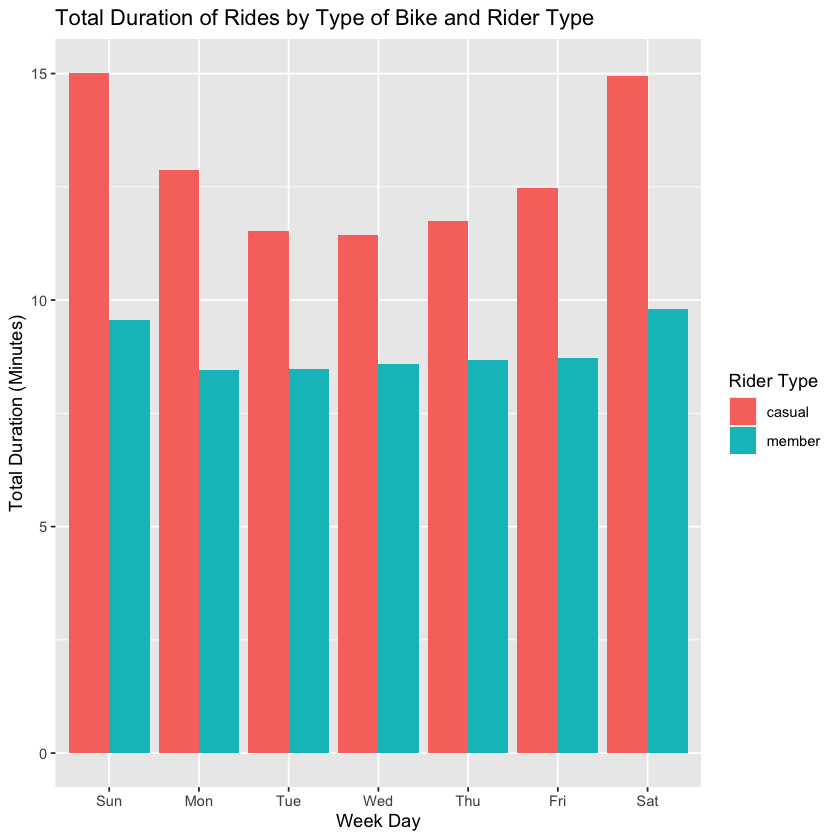

In [24]:
# Define a function to calculate the median ride length by week day and rider type
calculate_total_duration <- function(data) {
  data %>%
    group_by(week_day, member_casual) %>%
    summarise(total_duration = median(ride_length, na.rm = TRUE)) %>%
    # test the line below "mutate...   "
    mutate(percent_of_total = scales::percent(total_duration / sum(total_duration), accuracy = 0.01)) %>%
    ungroup()
}

# Call the function to calculate the summary table
df_total_duration <- calculate_total_duration(cleaned_data)

# Create bar chart to visualize the total duration of rides by type of bike and rider type
ggplot(df_total_duration, aes(x = week_day, y = total_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Total Duration of Rides by Type of Bike and Rider Type",
       x = "Week Day", y = "Total Duration (Minutes)",
       fill = "Rider Type")

# Print the summary table again if needed
head(df_total_duration)

<hr>
<h3>Top 10 Stations used by Casual Riders<h3>
<hr>

    The number of start station name rides for casual members

In [25]:
# Group the data by start_station_name and member_casual, and count the number of rides for casual members only
df_num_rides <- cleaned_data %>%
  filter(member_casual == "casual") %>%
  group_by(start_station_name) %>%
  summarise(num_rides = n())

# Calculate percentage of rides for each start_station_name for casual members only
df_percent <- df_num_rides %>%
  mutate(percent = scales::percent(num_rides/sum(num_rides), accuracy = 0.01))

# Sort the data by descending order of num_rides and select top 10 start station names
df_top10 <- df_percent %>%
  arrange(desc(num_rides)) %>%  # sort by descending order of num_rides
  head(10)                      # show top 10 rows

# Print the resulting dataframe
df_top10

start_station_name,num_rides,percent
<chr>,<int>,<chr>
NA,347395,14.96%
Streeter Dr & Grand Ave,58094,2.50%
DuSable Lake Shore Dr & Monroe St,31862,1.37%
Millennium Park,25529,1.10%
Michigan Ave & Oak St,25265,1.09%
DuSable Lake Shore Dr & North Blvd,23657,1.02%
Shedd Aquarium,20265,0.87%
Theater on the Lake,18452,0.79%
Wells St & Concord Ln,16217,0.70%


    The number of end station name rides for casual members

In [26]:
# Group the data by start_station_name and member_casual, and count the number of rides for casual members only
df_num_rides <- cleaned_data %>%
  filter(member_casual == "casual") %>%
  group_by(end_station_name) %>%
  summarise(num_rides = n())

# Calculate percentage of rides for each start_station_name for casual members only
df_percent <- df_num_rides %>%
  mutate(percent = scales::percent(num_rides/sum(num_rides), accuracy = 0.01))

# Sort the data by descending order of num_rides and select top 10 start station names
df_top10 <- df_percent %>%
  arrange(desc(num_rides)) %>%  # sort by descending order of num_rides
  head(10)                      # show top 10 rows

# Print the resulting dataframe
df_top10

end_station_name,num_rides,percent
<chr>,<int>,<chr>
NA,408882,17.61%
Streeter Dr & Grand Ave,59876,2.58%
DuSable Lake Shore Dr & Monroe St,29603,1.27%
Millennium Park,26677,1.15%
Michigan Ave & Oak St,26450,1.14%
DuSable Lake Shore Dr & North Blvd,26144,1.13%
Theater on the Lake,19418,0.84%
Shedd Aquarium,18631,0.80%
Wells St & Concord Ln,15507,0.67%


<hr>
<h3>Top 10 State and End Stations used by Member Riders<h3>
<hr>

    The number of start station name rides for casual members

In [27]:
# Group the data by start_station_name and member_casual, and count the number of rides for casual members only
df_num_rides <- cleaned_data %>%
  filter(member_casual == "member") %>%
  group_by(start_station_name) %>%
  summarise(num_rides = n())

# Calculate percentage of rides for each start_station_name for casual members only
df_percent <- df_num_rides %>%
  mutate(percent = scales::percent(num_rides/sum(num_rides), accuracy = 0.01))

# Sort the data by descending order of num_rides and select top 10 start station names
df_top10 <- df_percent %>%
  arrange(desc(num_rides)) %>%  # sort by descending order of num_rides
  head(10)                      # show top 10 rows

# Print the resulting dataframe
df_top10

start_station_name,num_rides,percent
<chr>,<int>,<chr>
NA,485646,14.52%
Kingsbury St & Kinzie St,24937,0.75%
Clark St & Elm St,22040,0.66%
Wells St & Concord Ln,21298,0.64%
University Ave & 57th St,19953,0.60%
Clinton St & Washington Blvd,19827,0.59%
Ellis Ave & 60th St,19503,0.58%
Loomis St & Lexington St,19128,0.57%
Wells St & Elm St,18987,0.57%


    The number of end station name rides for casual members

In [28]:
# Group the data by start_station_name and member_casual, and count the number of rides for casual members only
df_num_rides <- cleaned_data %>%
  filter(member_casual == "member") %>%
  group_by(end_station_name) %>%
  summarise(num_rides = n())

# Calculate percentage of rides for each start_station_name for casual members only
df_percent <- df_num_rides %>%
  mutate(percent = scales::percent(num_rides/sum(num_rides), accuracy = 0.01))

# Sort the data by descending order of num_rides and select top 10 start station names
df_top10 <- df_percent %>%
  arrange(desc(num_rides)) %>%  # sort by descending order of num_rides
  head(10)                      # show top 10 rows

# Print the resulting dataframe
df_top10

end_station_name,num_rides,percent
<chr>,<int>,<chr>
NA,483844,14.46%
Kingsbury St & Kinzie St,24636,0.74%
Clark St & Elm St,22367,0.67%
Wells St & Concord Ln,21914,0.66%
University Ave & 57th St,20534,0.61%
Clinton St & Washington Blvd,20529,0.61%
Clinton St & Madison St,19725,0.59%
Ellis Ave & 60th St,19198,0.57%
Loomis St & Lexington St,18903,0.57%


<hr>
<h3>EXPORT SUMMARY FILE FOR FURTHER ANALYSIS</h3>
<hr>

In [29]:
# Write the member trip data to a CSV file with filename Cyclistic_member_trips.csv
member_trips <- select(cleaned_data, -c('ride_id','rideable_type','member_casual','start_station_name','end_station_name','day_n','hour','week_day','month','ride_length'))

# Exclude row names from the CSV output
write.csv(member_trips, file = "Cyclistic_member_trips.csv", row.names = FALSE)

<hr>
<h3 style = 'text-transform:uppercase'> Key Findings and Recommendations</h3>
<hr>

<h4>Key Findings</h4>

    The bike-sharing program shows a contrast in the riding patterns of annual members and casual riders. According to the data, annual members complete more rides per month than casual riders, but on average, casual riders have longer ride durations. Additionally, the riding habits of these two groups differ in terms of their preferred days of the week. Casual riders tend to ride more frequently on weekends, while annual members use the program more during weekdays than on weekends. Notably, Docker bikes contribute to 32% of the total ride duration.

<h4>Recommendations</h4>

    Introduce a new annual membership option that would be priced lower than the existing one. This new tier would allocate a set number of rides for a specific period, like a week or a month, unlike the current membership structure that allows for unlimited rides within a 45-minute limit per ride. This decision will take into account the fact that, on average, casual riders tend to spend more time on their rides than the current members.